## Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from norm import *
from utils import *
from MostJoints.getMostInformativeJoints import *
import os
from itertools import chain
import setting

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
%matplotlib inline

## Make skeleton coordinators matrix

In [2]:
DATA_PATH = 'data/'
ACTION_SETS_PATH = 'actionsets/'
ACTION_SETS  = ['actionsets/ActionSet1.txt', 'actionsets/ActionSet2.txt', 'actionsets/ActionSet3.txt']
ACTION_NAMES = ['Wave','Hammer','Smash','Catch','Forward Punch','Throw','Draw X','Draw Tick','Draw ',
               'Circle','Clapping Hand','Two hand Wave','Side Boxing','Bend','Forward Kick','Side Kick','Jogging',
               'Tennis Swing','Tennis Serve','Golf Swing','Pickup&throw']

In [3]:
TRAINING_SUBJECTS = ['s01','s03','s05','s07','s09']
TESTING_SUBJECTS = ['s02','s04','s06','s08','s10']
data_file_names = os.listdir(DATA_PATH)
print("Number of video files: ", len(data_file_names))

Number of video files:  564


In [4]:
train_data_file_names = [data_file_names[i] for i in range(len(data_file_names)) if data_file_names[i][4:7] in TRAINING_SUBJECTS]
test_data_file_names = [data_file_names[i] for i in range(len(data_file_names)) if data_file_names[i][4:7] in TESTING_SUBJECTS]

In [5]:
print("Number of training videos: ", len(train_data_file_names))
print("Number of testing videos: ", len(test_data_file_names))

Number of training videos:  291
Number of testing videos:  270


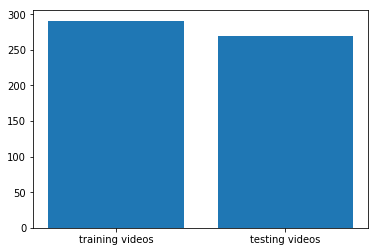

In [6]:
x_labels = ['training videos', 'testing videos']
y_labesl = [len(train_data_file_names), len(test_data_file_names)]
plt.bar(x_labels, y_labesl)
plt.show()

## Get most informative joints of each action

In [7]:
def get_most_informative_joints(filenames):
    # Notice that filenames shoube be sorted before fitting into this method
    # For training phase
    noFramesList = []
    d1 = {'a0' + str(i) : [] for i in range(1,10)}
    d2 = {'a' + str(i) : [] for i in range(10, 21)}
    mostInformativeJointsList = dict(chain.from_iterable(d.items() for d in (d1,d2)))
    for i in range(len(filenames)):
        with open('data/' + filenames[i], 'r') as f:
            skeleton_i_th = [line.rstrip('\n') for line in f]
        for j in range(len(skeleton_i_th)):
            skeleton_i_th[j] = [float(coord) for coord in skeleton_i_th[j].split(' ')]
        skeleton_i_th = np.asarray(skeleton_i_th)
        noFrames = int(skeleton_i_th.shape[0]/setting.NUMBER_OF_JOINTS)
        x = skeleton_i_th[:,0]
        y = skeleton_i_th[:,1]
        z = skeleton_i_th[:,2]
        x = x.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_i_th.shape[0]/setting.NUMBER_OF_JOINTS))
        y = y.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_i_th.shape[0]/setting.NUMBER_OF_JOINTS))
        z = z.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_i_th.shape[0]/setting.NUMBER_OF_JOINTS))
        t = np.arange(1, noFrames+1)
        noFramesList.append(noFrames)
        listIdxMostJoints = getMostJoints(x.T,y.T,z.T,1,setting.NUMBER_OF_JOINTS)
        mostInformativeJointsList[filenames[i][0:3]].append(listIdxMostJoints)
    return noFramesList, mostInformativeJointsList

In [8]:
# sorted list of filenames 
train_data_file_names = sorted(train_data_file_names)
test_data_file_names = sorted(test_data_file_names)

In [9]:
train_noFrameList, train_mostInformativeJointsList = get_most_informative_joints(train_data_file_names)

## Create histograms to present apperance of joints for each action

In [10]:
def plot_histograms(action_label):
    action = train_mostInformativeJointsList[action_label]
    Ns_4 = [0 for i in range(20)]
    Ns_8 = [0 for i in range(20)]
    Ns_12 = [0 for i in range(20)]
    
    for i in range(len(action)):
        for j in range(0, 12):
            if j < 4:
                Ns_4[action[i][j]-1] += 1
            if j < 8:
                Ns_8[action[i][j]-1] += 1
            if j < 12:
                Ns_12[action[i][j]-1] += 1
    x_labels = [i for i in range(1,21)]
    fig, ax = plt.subplots(figsize=(10,6))
    ind = np.arange(20)
    width = 0.35
    p1 = ax.bar(ind, Ns_4, width, color='indianred')
    p2 = ax.bar(ind+width, Ns_8, width, color='dimgray')
    p3 = ax.bar(ind+width*2, Ns_12, width, color='lightseagreen')
    ax.set_title('Joint apperances of action' + action_label)
    ax.set_xticks(ind+width/2)
    ax.set_xticklabels(x_labels)
    ax.legend((p1[0], p2[0], p3[0]), ('Ns_4', 'Ns_8', 'Ns_12'))
    ax.autoscale_view()
    plt.show()
    return Ns_4, Ns_8, Ns_12

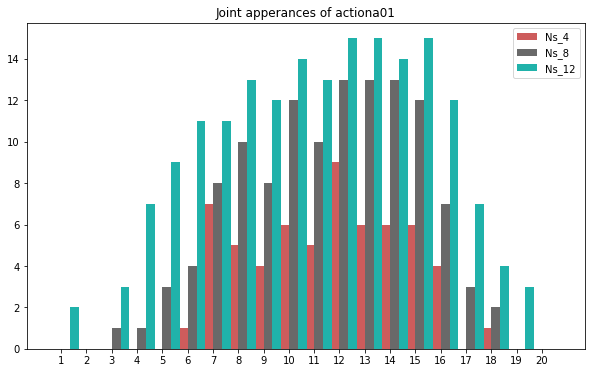

([0, 0, 0, 0, 0, 1, 7, 5, 4, 6, 5, 9, 6, 6, 6, 4, 0, 1, 0, 0],
 [0, 0, 1, 1, 3, 4, 8, 10, 8, 12, 10, 13, 13, 13, 12, 7, 3, 2, 0, 0],
 [2, 0, 3, 7, 9, 11, 11, 13, 12, 14, 13, 15, 15, 14, 15, 12, 7, 4, 3, 0])

In [11]:
plot_histograms('a01')

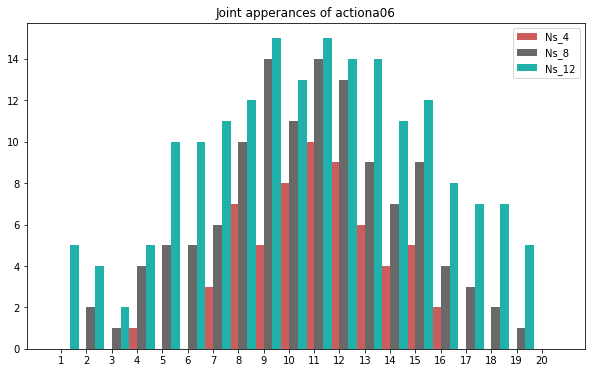

([0, 0, 0, 1, 0, 0, 3, 7, 5, 8, 10, 9, 6, 4, 5, 2, 0, 0, 0, 0],
 [0, 2, 1, 4, 5, 5, 6, 10, 14, 11, 14, 13, 9, 7, 9, 4, 3, 2, 1, 0],
 [5, 4, 2, 5, 10, 10, 11, 12, 15, 13, 15, 14, 14, 11, 12, 8, 7, 7, 5, 0])

In [12]:
plot_histograms('a06')

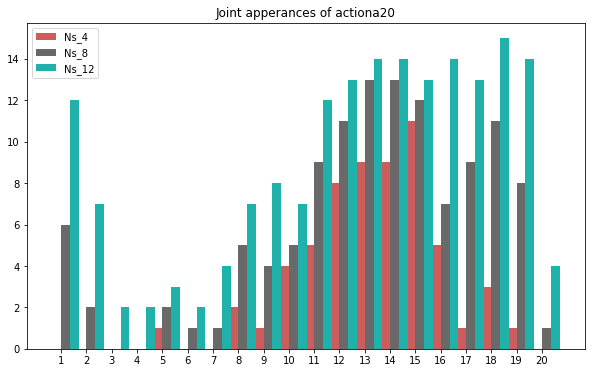

([0, 0, 0, 0, 1, 0, 0, 2, 1, 4, 5, 8, 9, 9, 11, 5, 1, 3, 1, 0],
 [6, 2, 0, 0, 2, 1, 1, 5, 4, 5, 9, 11, 13, 13, 12, 7, 9, 11, 8, 1],
 [12, 7, 2, 2, 3, 2, 4, 7, 8, 7, 12, 13, 14, 14, 13, 14, 13, 15, 14, 4])

In [13]:
plot_histograms('a20')

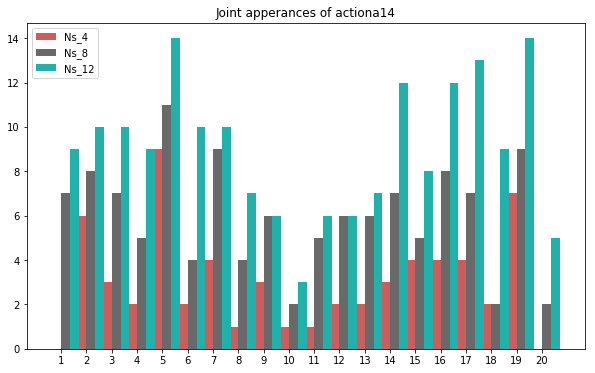

([0, 6, 3, 2, 9, 2, 4, 1, 3, 1, 1, 2, 2, 3, 4, 4, 4, 2, 7, 0],
 [7, 8, 7, 5, 11, 4, 9, 4, 6, 2, 5, 6, 6, 7, 5, 8, 7, 2, 9, 2],
 [9, 10, 10, 9, 14, 10, 10, 7, 6, 3, 6, 6, 7, 12, 8, 12, 13, 9, 14, 5])

In [14]:
plot_histograms('a14')

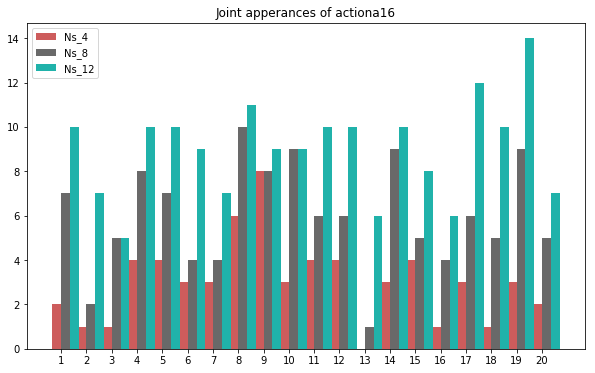

([2, 1, 1, 4, 4, 3, 3, 6, 8, 3, 4, 4, 0, 3, 4, 1, 3, 1, 3, 2],
 [7, 2, 5, 8, 7, 4, 4, 10, 8, 9, 6, 6, 1, 9, 5, 4, 6, 5, 9, 5],
 [10, 7, 5, 10, 10, 9, 7, 11, 9, 9, 10, 10, 6, 10, 8, 6, 12, 10, 14, 7])

In [15]:
plot_histograms('a16')

In [16]:
def sort_and_keep_indexes(Ns, numOfJoints):
    Ns = sorted(range(len(Ns)), key = Ns.__getitem__)
    Ns = Ns[len(Ns)-numOfJoints:]
    return Ns

In [17]:
# Similar method but it only gets indexes
def get_idx_mostJoints_for_each_action(action_label):
    action = train_mostInformativeJointsList[action_label]
    Ns_4 = [0 for i in range(20)]
    Ns_8 = [0 for i in range(20)]
    Ns_12 = [0 for i in range(20)]

    for i in range(len(action)):
        for j in range(0, 12):
            if j < 4:
                Ns_4[action[i][j] - 1] += 1
            if j < 8:
                Ns_8[action[i][j] - 1] += 1
            if j < 12:
                Ns_12[action[i][j] - 1] += 1
    Ns_4 = np.asarray(sort_and_keep_indexes(Ns_4, 4))
    Ns_8 = np.asarray(sort_and_keep_indexes(Ns_8, 8))
    Ns_12 = np.asarray(sort_and_keep_indexes(Ns_12, 12))
    return Ns_4, Ns_8, Ns_12

## For 4 most informative joints / Trash code/ Done

In [18]:
# Get action labels
# Hold this code here
# For Ns_4 only
action_label_list = list(train_mostInformativeJointsList.keys())
Ns4_list = np.zeros((len(action_label_list), 4), dtype=np.int)
for i in range(Ns4_list.shape[0]):
    Ns_4, _, _ = get_idx_mostJoints_for_each_action(action_label_list[i])
    Ns4_list[i] = Ns_4

In [19]:
def get_MIJ_matrices(filename):
    
    action_label = int(filename[1:3])-1
    
    with open('data/' + filename, 'r') as f:
        skeleton_matrix = [line.rstrip('\n') for line in f]
    for j in range(len(skeleton_matrix)):
        skeleton_matrix[j] = [float(coord) for coord in skeleton_matrix[j].split(' ')]
    
    skeleton_matrix = np.asarray(skeleton_matrix)
    noFrames = int(skeleton_matrix.shape[0]/setting.NUMBER_OF_JOINTS)
    x = skeleton_matrix[:,0]
    y = skeleton_matrix[:,1]
    z = skeleton_matrix[:,2]

    x = x.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_matrix.shape[0]/setting.NUMBER_OF_JOINTS))
    y = y.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_matrix.shape[0]/setting.NUMBER_OF_JOINTS))
    z = z.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_matrix.shape[0]/setting.NUMBER_OF_JOINTS))
    t = np.arange(1, noFrames+1).T
    x = x[Ns4_list[action_label]]
    y = y[Ns4_list[action_label]]
    z = z[Ns4_list[action_label]]
    return x,y,z,t

In [20]:
def calculateCovarianceMat(X, Y, Z, T, nLevels, overlap = False, timeVar=True):
    nFrames = X.shape[0]
    nJoins = X.shape[1]
    assert Y.shape[0] == nFrames
    assert Z.shape[0] == nFrames
    assert T.shape[0] == nFrames
    assert Y.shape[1] == nJoins
    assert Z.shape[1] == nJoins

    # Normalize skeleton coordinators

    normX = normCord(X)
    normY = normCord(Y)
    normZ = normCord(Z)
    normT = normSeT(T)

    # Create a list of full covariance matrices
    fullCovMats = [[] for i in range(nLevels)]
    covMats = [[] for i in range(nLevels)]

    if timeVar:
        sizeMatrix = nJoins*3+1
    else:
        sizeMatrix = nJoins*3

    listIdxMatrix = getValueMatrix(sizeMatrix) # get half of covariance matrix indexes


    for l in range(1,nLevels+1):
        # Compute covariance matrixes for each level
        nofMats = 2**(l-1)
        sizeWindow = 1/nofMats
        stepWindow = sizeWindow
        if overlap:
            stepWindow = stepWindow/2
            nofMats = nofMats*2-1
        startFrameTimes = [stepWindow*i for i in range(nofMats)]
        fullCovMats[l-1] = [[] for i in range(nofMats)]
        covMats[l-1] = [[] for i in range(nofMats)]
        for i in range(len(startFrameTimes)):
            startTime = startFrameTimes[i]
            endTime = startFrameTimes[i] + sizeWindow + 2*np.finfo(float).eps
            sliceInds = [i for i in range(T.shape[0]) if normT[i] >= startTime and normT[i] < endTime]
            sliceX = normX[sliceInds, :]
            sliceY = normY[sliceInds, :]
            sliceZ = normZ[sliceInds, :]
            sliceT = normT[sliceInds]
            if not timeVar:
                sliceVars = np.concatenate((np.concatenate((sliceX,sliceY), axis=1), sliceZ), axis=1)
            else:
                sliceVars = np.concatenate((np.concatenate((sliceX, sliceY), axis=1), np.concatenate((sliceZ, sliceT), axis=1)), axis=1)
            covarianceMat = np.cov(sliceVars.T)
            fullCovMats[l-1][i] = covarianceMat
            # Get half of covarianceMat and save it as a vector (1-D matrix)
            one_half_vector = []
            mask = np.zeros_like(covarianceMat, dtype=np.bool)
            mask[np.triu_indices_from(mask)] = True
            for row in range(covarianceMat.shape[0]):
                for column in range(covarianceMat.shape[0]):
                    if mask[row][column] == True:
                        one_half_vector.append(covarianceMat[row][column])
            covMats[l-1][i] = np.asarray(one_half_vector)
        covMats[l-1] = np.asarray(covMats[l-1])
        
    covMats = np.asarray(covMats)
    vec = np.empty(0)
    for i in range(covMats.shape[0]):
        for j in range(covMats[i].shape[0]):
            vec = np.hstack((vec, covMats[i][j]))
    return fullCovMats, vec

## Now the training part is coming

In [80]:
def get_covariance_vector(x,y,z,t):
    fullCovmat, vec_covMat = calculateCovarianceMat(x.T, y.T, z.T, t, nLevels=3, overlap=True, timeVar=False)
    return vec_covMat

In [81]:
def make_preprocessed_training_data(filenames):
    X_train, y_train = [], []
    for i in range(len(filenames)):
        x, y, z, t = get_MIJ_matrices(filenames[i])
        vec_covMat = get_covariance_vector(x,y,z,t)
        label = int(filenames[i][1:3])
        X_train.append(vec_covMat)
        y_train.append(label)
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    return X_train, y_train

In [55]:
X_train, y_train = make_preprocessed_training_data(train_data_file_names)

In [56]:
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)

In [57]:
X_test, y_test = make_preprocessed_training_data(test_data_file_names)

In [58]:
y_hat = model.predict(X_test)

In [59]:
def get_acc(y_test, y_hat):
    count = 0
    for i in range(y_test.shape[0]):
        if y_test[i] == y_hat[i]:
            count += 1
    acc = (count/y_test.shape[0])*100
    return acc

In [60]:
print(get_acc(y_test, y_hat))

46.666666666666664


In [ ]:
def get_nan(X):
    Nan = np.isnan(X)
    for i in range(Nan.shape[0]):
        for j in range(Nan.shape[1]):
            if Nan[i][j] == True:
                print(i,j)

## For action set 3

In [114]:
with open(ACTION_SETS_PATH + 'ActionSet3.txt', 'r') as f:
    as1_names = f.readlines()

In [115]:
for i in range(len(as1_names)):
    as1_names[i] = as1_names[i].rstrip("\n")

In [116]:
train_as1_names = [as1_names[i] for i in range(len(as1_names)) if as1_names[i][4:7] in TRAINING_SUBJECTS]

In [117]:
test_as1_names = [as1_names[i] for i in range(len(as1_names)) if as1_names[i][4:7] in TESTING_SUBJECTS]

In [118]:
train_as1_names = [train_as1_names[i] + '_skeleton3D.txt' for i in range(len(train_as1_names))]
test_as1_names = [test_as1_names[i] + '_skeleton3D.txt' for i in range(len(test_as1_names))]

In [119]:
train_as1_noFrameList, train_as1_mostInformativeJointsList = get_most_informative_joints(train_as1_names)

In [120]:
def plot_histograms(action_label):
    action = train_as1_mostInformativeJointsList[action_label]
    Ns_4 = [0 for i in range(20)]
    Ns_8 = [0 for i in range(20)]
    Ns_12 = [0 for i in range(20)]
    
    for i in range(len(action)):
        for j in range(0, 12):
            if j < 4:
                Ns_4[action[i][j]-1] += 1
            if j < 8:
                Ns_8[action[i][j]-1] += 1
            if j < 12:
                Ns_12[action[i][j]-1] += 1
    x_labels = [i for i in range(1,21)]
    fig, ax = plt.subplots(figsize=(10,6))
    ind = np.arange(20)
    width = 0.35
    p1 = ax.bar(ind, Ns_4, width, color='indianred')
    p2 = ax.bar(ind+width, Ns_8, width, color='dimgray')
    p3 = ax.bar(ind+width*2, Ns_12, width, color='lightseagreen')
    ax.set_title('Joint apperances of action' + action_label)
    ax.set_xticks(ind+width/2)
    ax.set_xticklabels(x_labels)
    ax.legend((p1[0], p2[0], p3[0]), ('Ns_4', 'Ns_8', 'Ns_12'))
    ax.autoscale_view()
    plt.show()
    return Ns_4, Ns_8, Ns_12

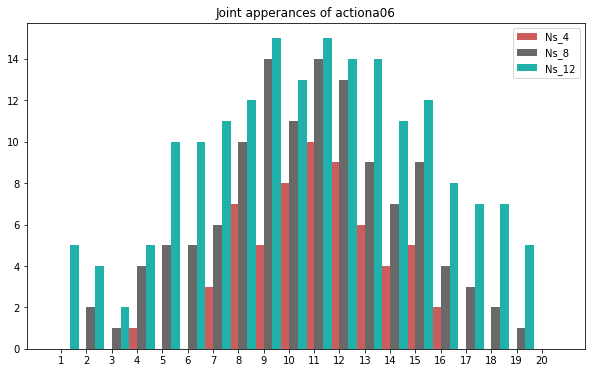

([0, 0, 0, 1, 0, 0, 3, 7, 5, 8, 10, 9, 6, 4, 5, 2, 0, 0, 0, 0],
 [0, 2, 1, 4, 5, 5, 6, 10, 14, 11, 14, 13, 9, 7, 9, 4, 3, 2, 1, 0],
 [5, 4, 2, 5, 10, 10, 11, 12, 15, 13, 15, 14, 14, 11, 12, 8, 7, 7, 5, 0])

In [126]:
plot_histograms('a06')

In [98]:
# Get action labels
# Hold this code here
# For Ns_4 only
def get_idx_mostJoints_for_each_action_as1(action_label):
    action = train_as1_mostInformativeJointsList[action_label]
    Ns_4 = [0 for i in range(20)]
    Ns_8 = [0 for i in range(20)]
    Ns_12 = [0 for i in range(20)]

    for i in range(len(action)):
        for j in range(0, 12):
            if j < 4:
                Ns_4[action[i][j] - 1] += 1
            if j < 8:
                Ns_8[action[i][j] - 1] += 1
            if j < 12:
                Ns_12[action[i][j] - 1] += 1
    Ns_4 = np.asarray(sort_and_keep_indexes(Ns_4, 4))
    Ns_8 = np.asarray(sort_and_keep_indexes(Ns_8, 8))
    Ns_12 = np.asarray(sort_and_keep_indexes(Ns_12, 12))
    return Ns_4, Ns_8, Ns_12

action_label_list = list(train_as1_mostInformativeJointsList.keys())
Ns4_as1_list = np.zeros((len(action_label_list), 4), dtype=np.int)
for i in range(Ns4_as1_list.shape[0]):
    Ns_4, _, _ = get_idx_mostJoints_for_each_action_as1(action_label_list[i])
    Ns4_as1_list[i] = Ns_4

In [99]:
Ns4_as1_list

array([[16, 17, 18, 19],
       [ 9, 11, 10,  8],
       [ 8,  5,  7,  6],
       [16, 17, 18, 19],
       [ 9, 11, 13,  8],
       [ 7,  9, 11, 10],
       [16, 17, 18, 19],
       [16, 17, 18, 19],
       [16, 17, 18, 19],
       [ 7,  9,  5,  8],
       [16, 17, 18, 19],
       [16, 17, 18, 19],
       [ 2, 17, 15, 18],
       [16, 17, 18, 19],
       [16, 17, 18, 19],
       [16, 17, 18, 19],
       [16, 17, 18, 19],
       [11,  9,  7,  8],
       [16, 17, 18, 19],
       [11, 12, 13, 14]])

In [100]:
def get_MIJ_matrices(filename):
    
    action_label = int(filename[1:3])-1
    
    with open('data/' + filename, 'r') as f:
        skeleton_matrix = [line.rstrip('\n') for line in f]
    for j in range(len(skeleton_matrix)):
        skeleton_matrix[j] = [float(coord) for coord in skeleton_matrix[j].split(' ')]
    
    skeleton_matrix = np.asarray(skeleton_matrix)
    noFrames = int(skeleton_matrix.shape[0]/setting.NUMBER_OF_JOINTS)
    x = skeleton_matrix[:,0]
    y = skeleton_matrix[:,1]
    z = skeleton_matrix[:,2]

    x = x.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_matrix.shape[0]/setting.NUMBER_OF_JOINTS))
    y = y.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_matrix.shape[0]/setting.NUMBER_OF_JOINTS))
    z = z.reshape(setting.NUMBER_OF_JOINTS, int(skeleton_matrix.shape[0]/setting.NUMBER_OF_JOINTS))
    t = np.arange(1, noFrames+1).T
    x = x[Ns4_as1_list[action_label]]
    y = y[Ns4_as1_list[action_label]]
    z = z[Ns4_as1_list[action_label]]
    return x,y,z,t

In [101]:
X_as1_train, y_as1_train = make_preprocessed_training_data(train_as1_names)
X_as1_test, y_as1_test = make_preprocessed_training_data(test_as1_names)

In [102]:
model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_as1_train, y_as1_train)

In [103]:
y_as1_hat = model.predict(X_as1_test)

In [104]:
print(get_acc(y_as1_test, y_as1_hat))

52.17391304347826


In [96]:
Ns4_as1_list

array([[13, 14,  6, 11],
       [13, 15, 10,  8],
       [ 8,  5,  7,  6],
       [ 7, 10,  8,  9],
       [ 9, 11, 13,  8],
       [ 7,  9, 11, 10],
       [ 6,  4,  5, 11],
       [14, 13, 12, 11],
       [10,  9, 11,  7],
       [ 7,  9,  5,  8],
       [ 8,  9, 12, 10],
       [ 7,  8, 12, 11],
       [ 1, 15,  2, 18],
       [16,  1, 18,  4],
       [12, 18,  9,  8],
       [11, 14,  7,  8],
       [12, 15, 10, 14],
       [11,  9,  7,  8],
       [14, 13, 15, 12],
       [11, 12, 13, 14]])

In [97]:
Ns4_list

array([[13, 14,  6, 11],
       [13, 15, 10,  8],
       [ 8,  5,  7,  6],
       [ 7, 10,  8,  9],
       [ 9, 11, 13,  8],
       [ 7,  9, 11, 10],
       [ 6,  4,  5, 11],
       [14, 13, 12, 11],
       [10,  9, 11,  7],
       [ 7,  9,  5,  8],
       [ 8,  9, 12, 10],
       [ 7,  8, 12, 11],
       [ 1, 15,  2, 18],
       [16,  1, 18,  4],
       [12, 18,  9,  8],
       [11, 14,  7,  8],
       [12, 15, 10, 14],
       [11,  9,  7,  8],
       [14, 13, 15, 12],
       [11, 12, 13, 14]])